Absatz: Digitale Werte, Wertebereiche (Daten, Zeit)

Im Gegensatz zu analogen Signalen können digitale Signale nur diskrete Werte annehmen. Das bedeutet, dass der Wertebereich in Intervalle aufgeteilt wird, welche durch eine ganze Zahl identifiziert werden können. Beispiel aus der digitalen Bildtechnik:

## Beispiel Foto

| ![Foto Analog-Digital](./bilder/tmp_vergleich_foto.png) |
|:--:|
| Bild: Vergleich analoges vs. digitales Bild, Bildquelle |

Bekommt man obiges auch Interaktiv hin? So mit reinzoomen?

## Umwandlung Analog zu Digital

Um aus analogen Werten, z.B. aus experimentellen Aufbauten, digitale Werte, z.B. für die Auswertung, zu gewinnen werden Umwandler genutzt. Diese analog-digital Umwandler werden AD-Wandler genannt.
Beispiel für die Umwandlung eines analogen Signals (graue Kurve) in ein digitales (rote Kurve). Die vertikal gestrichelten Linien geben das Abtastintervall an.

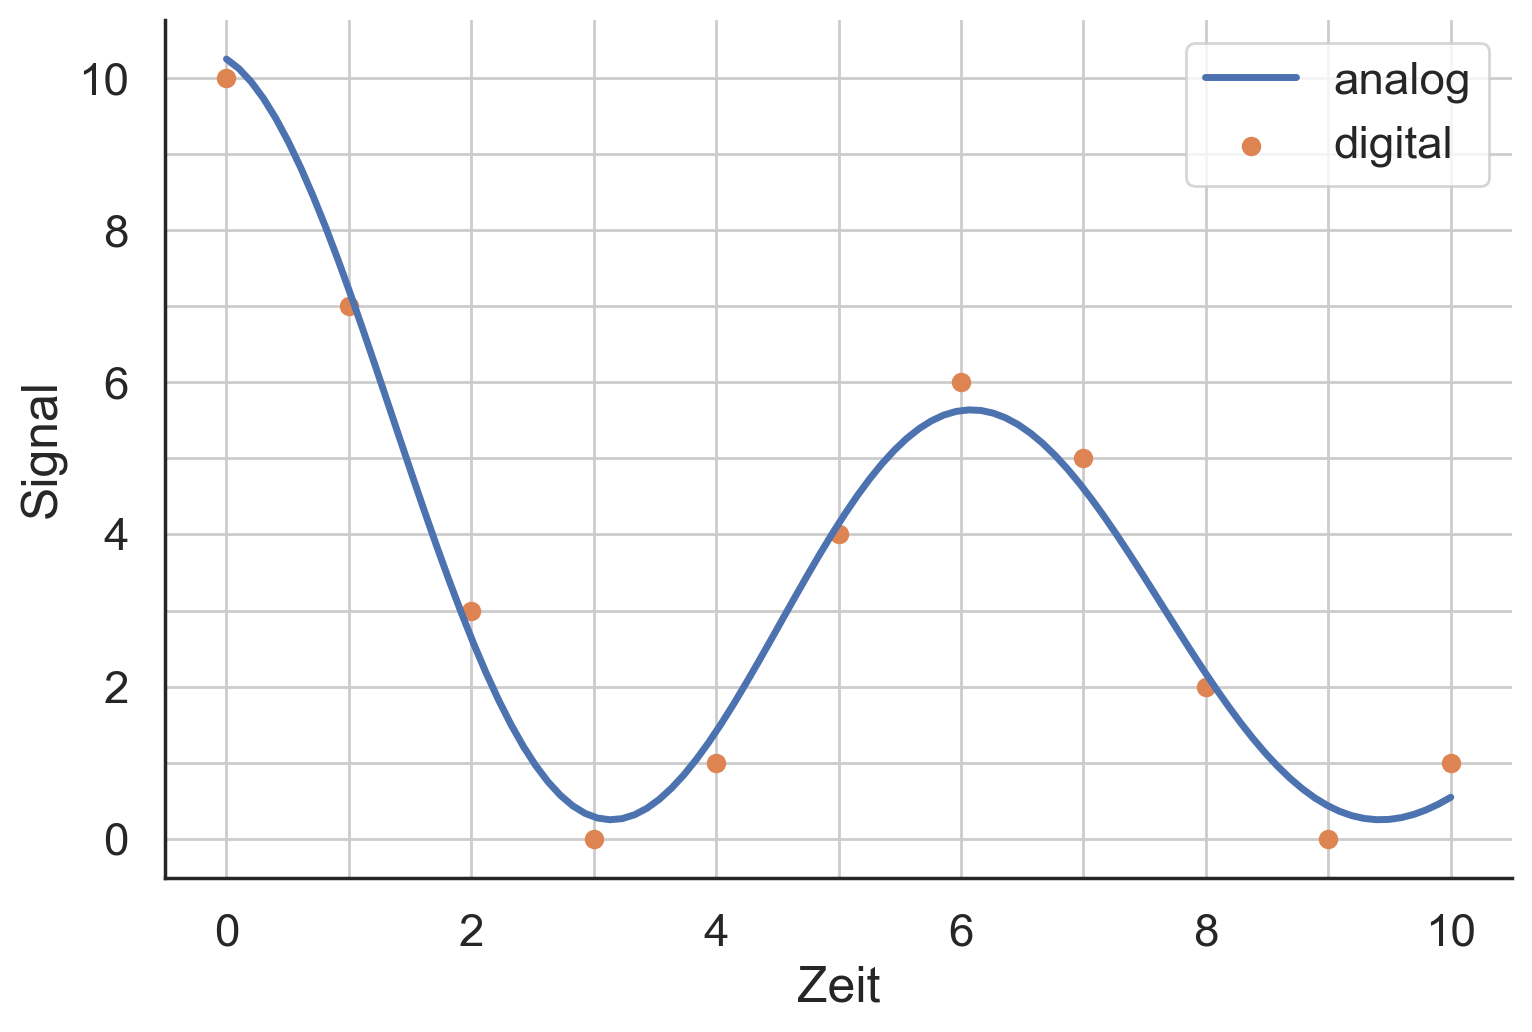

In [30]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
sns.set()
#sns.set(style="whitegrid")
sns.set_style('white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#plt.style.use("seaborn-notebook")

t = np.linspace(0, 10, 100)
f = (np.cos(t) + 1) * 5*np.exp(-t/10) + 0.25

td = np.linspace(0, 10, 11)
fd = np.round((np.cos(td) + 1) * 5*np.exp(-td/10) + 0.25)


#ax = sns.lineplot(t, f)
plt.plot(t, f, label='analog')
plt.scatter(td, fd, label='digital', color="C1")
plt.xlabel("Zeit")
plt.ylabel("Signal")

#ax.set(xlabel="Zeit", ylabel="Signal", label='analog')
sns.despine()


xmajor_ticks = np.arange(0, 12, 2)
xminor_ticks = np.arange(0, 11, 1)
ymajor_ticks = np.arange(0, 12, 2)
yminor_ticks = np.arange(0, 11, 1)

ax = plt.gca()

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

plt.tight_layout()
plt.grid(which='both')
plt.legend()
plt.savefig('./bilder/signal_digital_analog.png')

|![Analoges Signal](./bilder/tmp_signal_analog.png)|
|:--:|
| Bild anpassen, Wertebereich ist auch digital|

## Übertragung digitaler Signale

* Um mit digitalen / diskreten Werten und Signalen zu operieren, werden diese als Reihen von zwei Zuständen (0 und 1, oder wahr und falsch) dargestellt.
* In der Elektrotechnik wird der Zustand (1) durch eine angelegte Spannung (z.B. 5V) dargestellt. Der Zustand (0) etspricht einer spannungsfreien Leitung.
* Digitale Signale sind immer getaktet, dadurch wird der Zeitraum der Validität vorgegeben.

|![Analoges Signal](./bilder/tmp_i2c.png)|
|:--:|
| Bild anpassen?|